In [100]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import cv2
import re

sys.path.append('../')
%matplotlib inline

In [101]:

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
#     x_min, y_min, x_max, y_max = list(map(int, bbox))
#     print(bbox)
    x_min, y_min, w, h = (bbox)
    x_max = x_min + w
    y_max = y_min + h
#     x_min, y_min, x_max, y_max = list(map(round, bbox))

    img = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=BOX_COLOR, thickness=thickness)
    return img

def visualize(image, bboxes):
    img = image.copy()
#     img = image.clone().detach()
    for bbox in (bboxes):
#         print(bbox)
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)

In [102]:
def get_upper_dir(num) :
    upper_dir = ''
    if num > 0 and num <= 40 :
        upper_dir = '2021.01.06/'
    elif num <= 86 :
        upper_dir = '2021.01.07/'
    elif num <= 143 :
        upper_dir = '2021.01.08/'
    elif num <= 205 :
        upper_dir = '2021.01.11/'
    elif num <= 312 :
        upper_dir = '2021.01.12/'   
    elif num <= 360 :
        upper_dir = '2021.01.13/'
    elif num <= 428 :
        upper_dir = '2021.01.14/' 
    elif num <= 523 :
        upper_dir = '2021.01.15/'
    elif num <= 608 :
        upper_dir = '2021.05.11/'    
    elif num <= 681 :
        upper_dir = '2021.05.12/'
    elif num <= 748 :
        upper_dir = '2021.05.17/' 
    elif num <= 813 :
        upper_dir = '2021.05.18/'
    elif num <= 892 :
        upper_dir = '2021.05.20/'          
    elif num <= 952 :
        upper_dir = '2021.05.21/'
    elif num <= 1021 :
        upper_dir = '2021.05.24/' 
    elif num <= 1098 :
        upper_dir = '2021.05.25/'
    elif num <= 1173 :
        upper_dir = '2021.05.26/'  
    elif num <= 1245 :
        upper_dir = '2021.05.27/' 
    elif num <= 1351 :
        upper_dir = '2021.05.28/'
    elif num <= 1428 :
        upper_dir = '2021.05.31/'   
    elif num <= 1485 :
        upper_dir = '2021.06.01/'    
    elif num <= 1581 :
        upper_dir = '2021.06.02/'   
    elif num <= 1640 :
        upper_dir = '2021.06.03/'  
    elif num <= 1699 :
        upper_dir = '2021.06.04/'   
    elif num <= 1794 :
        upper_dir = '2021.06.07/'   
    elif num <= 1857 :
        upper_dir = '2021.06.10/'   
    elif num <= 1947 :
        upper_dir = '2021.06.11/'   
    elif num <= 2046 :
        upper_dir = '2021.06.14/'   
    elif num <= 2119 :
        upper_dir = '2021.06.15/'   
    elif num <= 2170 :
        upper_dir = '2021.06.16/'    
    elif num <= 2241 :
        upper_dir = '2021.06.17/'   
    elif num <= 2316 :
        upper_dir = '2021.06.18/'
        
    return 'patch_images/' + upper_dir

In [103]:
# from xml.etree.ElementTree import parse

# class XMLParser(object):
#     def __init__(self, xml_path):
#         self.task_name = ''
#         self.width = 2048
#         self.height = 2048
#         self.df = pd.DataFrame(columns=['index', 'label', 'bbox', 'xmin', 'ymin', 'w', 'h', 'occluded',
#        'description', 'cell_type', 'iscrowd', 'path'])

#         self.tree = parse(xml_path)
#         self.root = self.tree.getroot()
#         self.task_name = self.root.find("meta").find("task").find("name").text
#         # print(self.task_name)

#         images = self.root.findall("image")
#         for image in images:
#             file_name = image.get("name")
#             # print(file_name)
#             if 'scl' in file_name :
#                 task_name = file_name.split("scl/")[-1].split('-')[0]
#                 task_number = int(re.sub('LBC', '', task_name))
#                 uppder_dir = get_upper_dir(task_number)
#                 file_name = uppder_dir + task_name
#             else :
#                 file_name = file_name.split("patch_images/")[-1]
#                 bboxes = image.findall("box")
#                 labels = []
#                 if len(bboxes) != 0:
#                     for bbox in bboxes:
#                         label = bbox.get('label')
#                         xmin = float(bbox.get('xtl'))
#                         ymin = float(bbox.get('ytl'))
#                         xmax = float(bbox.get('xbr'))
#                         ymax = float(bbox.get('ybr'))
#                         # Append it
#                         labels.append([
#                             label, xmin, ymin, xmax, ymax
#                         ])

#     #             self.labels_info[file_name] = labels

In [104]:
# parser = XMLParser('../annotations/'+'task_[lsil] lbc141-20210105-2021_07_08_13_08_51'+'/annotations.xml')


In [105]:
df = pd.DataFrame(columns=['index', 'label', 'bbox', 'xmin', 'ymin', 'w', 'h', 'occluded',
       'description', 'cell_type', 'iscrowd', 'path'])
df.head()

,index,label,bbox,xmin,ymin,w,h,occluded,description,cell_type,iscrowd,path


In [106]:
# <annotations>
#   <version>1.1</version>
#   <meta>
#     <task>
#       <id>73</id>
#       <name>[ASCUS] LBC31-20210102</name>
#       <size>1385</size>
#       <mode>annotation</mode>
#       <overlap>0</overlap>
#       <bugtracker></bugtracker>
    
#     <image id="425" name="patch_images/2021.01.06/LBC31-20210102(1)/LBC31-20210102(1)_1498.png" width="2048" height="2048">
#     <box label="LSIL" occluded="0" source="manual" xtl="2.71" ytl="1156.03" xbr="163.70" ybr="1483.29" z_order="0">
#       <attribute name="Description">Low-grade squamous intraepithelial lesion</attribute>
#     </box>
#   </image>

In [107]:
from xml.etree.ElementTree import parse


src_path = '../annotations/'
# df = pd.DataFrame(columns=['index', 'file_name', 'label', 'xmin', 'ymin', 'w', 'h', 'occluded', 'des', 'cell_type'])
df = pd.DataFrame(columns=['file_name', 'task', 'label', 'xmin', 'ymin', 'w', 'h', 'occluded', 'des', 'cell_type'])
# data_list = []

file_names = []
task_names = []
labels = []
xmins = []
ymins = []
ws = []
hs = []
occludeds = []
dess = []
cell_types = []

xml_list = [d +'/annotations.xml' for d in os.listdir(src_path) if not d.endswith('.zip')]
for xml_path in xml_list :
#     print(xml_path)
    if not 'ipynb_checkpoints' in xml_path :
#         print(src_path + xml_path)
        parser = parse(src_path + xml_path)
        root = parser.getroot()
        task_name = root.find("meta").find("task").find("name").text
        print(task_name)
        images = root.findall("image")
        
        for image in images:
            file_name = image.get("name")
            # print(file_name)
            if 'scl' in file_name :
                task_name = file_name.split("scl/")[-1].split('-')[0]
                task_number = int(re.sub('LBC', '', task_name))
                uppder_dir = get_upper_dir(task_number)
                file_name = uppder_dir + re.sub('scl/', '', file_name)     
                # print(file_name)
            elif 'negative' in file_name :
                task_name = file_name.split("negative/")[-1].split('-')[0]
                task_number = int(re.sub('LBC', '', task_name))
                uppder_dir = get_upper_dir(task_number)
                file_name = uppder_dir + re.sub('negative/', '', file_name)     
                # print(file_name)

            elif len(file_name.split('/')) ==  3 :
                file_name = 'patch_images/' + file_name

            bboxes = image.findall("box")
            if len(bboxes) > 0:
#                 print(len(bboxes))
                for bbox in bboxes:
                    label = bbox.get('label')
                    xmin = float(bbox.get('xtl'))
                    ymin = float(bbox.get('ytl'))
                    xmax = float(bbox.get('xbr'))
                    ymax = float(bbox.get('ybr'))
                    occluded = bbox.get('occluded')
                    # Append it
#                     print(file_name)
                    if not bbox.find('attribute') is None :
                        if bbox.find('attribute').get('name') == 'description' :
                            des = bbox.find('attribute').text
                            cell_type = ''
                        else :
                            cell_type = bbox.find('attribute').text
                            des = ''
                    else :
                        cell_type = ''
                        des = ''                        

                    file_names.append(file_name)
                    task_names.append(task_name.split('-2')[0])
                    labels.append(label)
                    xmins.append(xmin)
                    ymins.append(ymin)
                    ws.append(xmax-xmin)
                    hs.append(ymax-ymin)
                    occludeds.append(occluded)
                    dess.append(des)
                    cell_types.append(cell_type)


[AS6] LBC424-20210111
[ASCUS] LBC573-20210113
[ASCUS] LBC37-20210102
[LSIL] LBC427-20210111
[ASCUS] LBC306-20210108
[ASCUS] LBC590-20210113
[LSIL] LBC84-20210104
[LS6] LBC1347-20210125
[ASCUS] LBC242-20210107
[LS6] LBC1348-20210125
[ASC-H] LBC1854-20210202
[LS6] LBC1342-20210125
[ASCUS] LBC307-20210108
[ASCUS] LBC574-20210113
[AH6] LBC952-20210119
[LSIL] LBC1634-20210129
[AH6] LBC1098-20210121
[Carcinoma] LBC205-20210106
[ASCUS] LBC68-20210104
[AS6] LBC345-20210109
[AS6] LBC411-20210111
[ASC-H] LBC204-20210106
[ASCUS] LBC137-20210105
[ASCUS] LBC33-20210102
[LSIL] LBC600-20210113
[ASCUS] LBC83-20210104
[LSIL] LBC310-20210108
[AS6] LBC420-20210111
[LSIL] LBC1571-20210128
[ASCUS] LBC133-20210105
[AS6] LBC408-20210111
[ASCUS] LBC181-20210106
[ASCUS] LBC139-20210105
[Candida] LBC149-20210106
[AS6] LBC425-20210111
[AS6] LBC415-20210111
[AS6] LBC359-20210109
[LSIL] LBC2167-20210206
[ASC-H] LBC1789-20210201
[LS6] LBC248-20210107
Negative
[AH6] LBC1427-20210126
[ASCUS] LBC595-20210113
[ASC-H] L

In [108]:
df.file_name = file_names
df.task = task_names
df.label = labels
df.xmin = xmins
df.ymin = ymins
df.w = ws
df.h = hs
df.occluded = occludeds
df.des = dess
df.cell_type = cell_types


In [109]:
df.shape

(24782, 10)

In [110]:
df.xmin = df.xmin.apply(lambda x : int(x))
df.ymin = df.ymin.apply(lambda x : int(x))
df.w = df.w.apply(lambda x : int(x))
df.h = df.h.apply(lambda x : int(x))
df['bbox'] = df.apply(lambda x : [x['xmin'], x['ymin'], x['w'], x['h']], axis=1)

In [111]:
df = df[['file_name', 'task','bbox', 'xmin', 'ymin', 'w', 'h','label', 'occluded', 'des', 'cell_type']]
df.head()

,file_name,task,bbox,xmin,ymin,w,h,label,occluded,des,cell_type
0,patch_images/2021.01.14/LBC424-20210111(1)/LBC...,[AS6] LBC424,"[1539, 199, 139, 211]",1539,199,139,211,C,0,,ASC-US
1,patch_images/2021.01.14/LBC424-20210111(1)/LBC...,[AS6] LBC424,"[1337, 102, 256, 136]",1337,102,256,136,AS,0,,ASC-US
2,patch_images/2021.01.14/LBC424-20210111(1)/LBC...,[AS6] LBC424,"[220, 619, 166, 169]",220,619,166,169,AS,0,,ASC-US
3,patch_images/2021.01.14/LBC424-20210111(1)/LBC...,[AS6] LBC424,"[658, 1747, 191, 166]",658,1747,191,166,AS,0,,ASC-US
4,patch_images/2021.01.14/LBC424-20210111(1)/LBC...,[AS6] LBC424,"[1571, 365, 136, 146]",1571,365,136,146,AS,0,,ASC-US


In [112]:
# for task in (set(df.task)) :
#     print(task)
#     print(df[df['task']==task].shape)
    

/home/Dataset/scl/patch_images/2021.01.11/LBC149-20210106(1)/LBC149-20210106(1)_721.png
<class 'numpy.ndarray'>


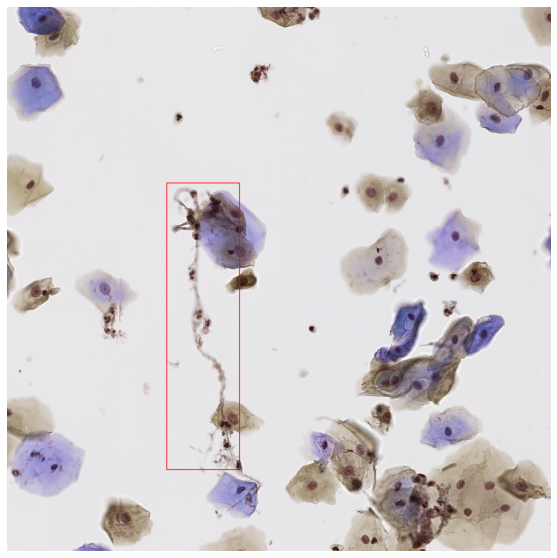

In [113]:
Num = 1500
img_dir = '/home/Dataset/scl/'
# print(img_dir + df.loc[Num]['path'])
img = cv2.imread(img_dir + df.loc[Num]['file_name'])
print(img_dir + df.loc[Num]['file_name'])
print(type(img))
bbox = df.loc[Num]['bbox']

%matplotlib inline
visualize(img, [bbox])
    # bbox = [1603.23, 1558.58, 73.23, 96.86]

In [114]:
# df.head()

In [115]:
id_dict = {}
for i, f in enumerate(list(df.file_name.unique())) :
    id_dict[f] = i

In [116]:
df['ID'] = df.file_name.apply(lambda x : id_dict[x])
df = df[['ID', 'file_name', 'task', 'bbox', 'xmin', 'ymin', 'w', 'h', 'label',
       'occluded', 'des', 'cell_type']]

In [117]:
df.to_csv('../df.csv', index=None)

In [118]:
df = pd.read_csv('../df.csv')
print(df.shape)

(24782, 12)


In [119]:
df.label.value_counts()

AS                           6562
Negative                     4468
LS                           3083
ASC-US                       2897
LSIL                         1689
ASC-US with HPV infection    1603
AH                            962
HS                            667
HSIL                          548
C                             527
LSIL with HPV infection       479
Candida                       402
N - Endocervical Cell         306
ASC-H                         263
HSIL with HPV infection       142
HN                            102
Benign atypia                  46
Carcinoma                      18
H                               9
판독불가                            4
ASCUS-SIL                       2
N - Endometrial cell            1
ASC-H with HPV infection        1
SC                              1
Name: label, dtype: int64

In [120]:
df.shape

(24782, 12)

In [121]:
# df.drop(df.index[df['task'] == 'LBC10'], inplace=True)
# df.shape

In [122]:
# remove negative cell by grouping
df.drop(df.index[df['task'] == 'LBC108'], inplace=True)
df.shape

(23773, 12)

In [123]:
df.drop(df.index[df['task'] == 'LBC115'], inplace=True)
df.shape

(22986, 12)

In [124]:
df.to_csv('../df.csv', index=None)
df = pd.read_csv('../df.csv')
print(df.shape)

(22986, 12)


In [127]:
for key, group in neg_df.groupby(['task']) :
    print(key)
    print(group.w.describe())
    # print(group.h.describe())

LBC10
count    827.000000
mean     146.021765
std       58.226322
min       57.000000
25%      104.000000
50%      131.000000
75%      174.000000
max      547.000000
Name: w, dtype: float64
LBC108
count    1009.000000
mean      303.787909
std       164.027481
min         5.000000
25%       189.000000
50%       246.000000
75%       365.000000
max      1099.000000
Name: w, dtype: float64
LBC115
count     787.000000
mean      245.475222
std       107.236678
min        67.000000
25%       184.000000
50%       218.000000
75%       274.500000
max      1015.000000
Name: w, dtype: float64
LBC1291
count    149.000000
mean      99.449664
std       32.036600
min       40.000000
25%       79.000000
50%       97.000000
75%      119.000000
max      206.000000
Name: w, dtype: float64
LBC14
count    169.000000
mean     139.514793
std       37.382213
min       74.000000
25%      116.000000
50%      131.000000
75%      159.000000
max      268.000000
Name: w, dtype: float64
LBC1455
count    190.000000
me

In [126]:
df.label.value_counts()

AS                           6562
LS                           3083
ASC-US                       2897
Negative                     2672
LSIL                         1689
ASC-US with HPV infection    1603
AH                            962
HS                            667
HSIL                          548
C                             527
LSIL with HPV infection       479
Candida                       402
N - Endocervical Cell         306
ASC-H                         263
HSIL with HPV infection       142
HN                            102
Benign atypia                  46
Carcinoma                      18
H                               9
판독불가                            4
ASCUS-SIL                       2
N - Endometrial cell            1
ASC-H with HPV infection        1
SC                              1
Name: label, dtype: int64